In [1]:
##Projet COVID

In [2]:
import os 

In [3]:
import pandas as pd
import pandas.plotting
from pandas.plotting import scatter_matrix
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import squarify

In [4]:
import scipy.stats
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression

import geopandas as gpd
# import geoplot as gplt
import mapclassify as mc
import libpysal as lps
#import pysal as ps
#from pysal.contrib.viz import mapping as maps
import folium

In [5]:
from matplotlib import animation
from matplotlib.animation import FuncAnimation,FFMpegFileWriter
from mpl_toolkits.mplot3d import Axes3D

In [6]:
# =============================================================================
#  Declaration du dossier de travail
# =============================================================================
base= r'D:\Navigation\Téléchargements\Cours Distance\Projet COVID\fichier'
base=base.replace('\\','/')
os.chdir(base)

In [7]:
RNB = pd.read_csv('RNB.csv',sep=',')
Continent =pd.read_csv('continent1.csv',sep = ",")
TabMond =pd.read_csv('tableau-donnes-monde.csv',sep = ";")


In [8]:
print(RNB.info())
print(Continent.info())
print(TabMond.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

In [9]:
#mise à jour des données
Deces = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
Infections = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
Guerisions= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
pandemie = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')
EvolPand =pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/15a5a5b8-8330-48a0-a385-e01b326d2213',sep = ";" ,skiprows= 3)
EvolMond =pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/f4935ed4-7a88-44e4-8f8a-33910a151d42',sep = ";" ,skiprows= 3)


In [17]:
#Summary

In [10]:

EvolPand.describe()

,Infections,Deces,Guerisons,TauxDeces,TauxGuerison,TauxInfection
count,1.070000e+02,107.000000,1.070000e+02,107.000000,107.000000,107.000000
mean,9.260720e+05,59645.635514,2.585583e+05,4.359626,25.757196,69.883178
std,1.194339e+06,84392.736857,3.566529e+05,1.751270,15.085223,15.650372
min,5.550000e+02,17.000000,2.800000e+01,2.040000,1.740000,41.270000
25%,7.419900e+04,1937.500000,1.346750e+04,2.865000,18.140000,60.875000
50%,1.685890e+05,6490.000000,7.603400e+04,3.850000,25.180000,68.950000
75%,1.722248e+06,105513.500000,3.891030e+05,6.125000,32.600000,79.250000
max,3.828475e+06,268424.000000,1.278316e+06,7.160000,55.270000,96.190000


In [11]:
Continent.describe() 

,day,month,year,cases,deaths,popData2018
count,207.000000,207.000000,207.0,207.000000,207.000000,2.040000e+02
mean,5.024155,4.990338,2020.0,370.289855,19.222222,3.700000e+07
std,0.347524,0.139010,0.0,1839.451824,97.522608,1.407163e+08
min,5.000000,3.000000,2020.0,-9.000000,0.000000,1.000000e+03
25%,5.000000,5.000000,2020.0,0.000000,0.000000,1.267305e+06
50%,5.000000,5.000000,2020.0,6.000000,0.000000,7.042862e+06
75%,5.000000,5.000000,2020.0,122.000000,3.000000,2.547777e+07
max,10.000000,5.000000,2020.0,22593.000000,1252.000000,1.392730e+09


In [12]:
TabMond.describe()

,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.TRAC.ZS,AG.PRD.CREL.MT,AG.YLD.CREL.KG,BM.GSR.MRCH.CD,BX.GSR.MRCH.CD,...,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.RUR.TOTL,SP.RUR.TOTL.ZG,SP.RUR.TOTL.ZS,TM.VAL.AGRI.ZS.UN,TM.VAL.SERV.CD.WT,TX.VAL.AGRI.ZS.UN,TX.VAL.SERV.CD.WT,Unnamed: 184
count,1.870000e+02,2.080000e+02,207.000000,205.000000,205.000000,1.800000e+02,184.000000,1.810000e+02,180.000000,1.900000e+02,...,191.000000,1.910000e+02,191.000000,2.110000e+02,205.000000,211.000000,196.000000,1.900000e+02,196.000000,1.900000e+02
mean,1.407091e+05,2.324006e+05,37.628094,0.191526,13.988169,4.059325e+06,406.552249,1.645110e+07,3550.066667,9.598750e+10,...,49.875433,1.994623e+07,50.124567,1.602805e+07,-2.699669,39.195730,1.303510,2.765317e+10,4.187293,2.928991e+10
std,4.505034e+05,6.325318e+05,22.348497,0.245527,13.492865,1.217676e+07,785.009183,6.281379e+07,3138.557052,2.800742e+11,...,3.358085,7.471032e+07,3.358085,7.434845e+07,24.188405,23.722483,0.958939,7.280446e+10,9.453633,8.128629e+10
min,1.000000e+00,3.000000e+00,0.557692,0.000100,0.002193,0.000000e+00,0.092963,0.000000e+00,167.600000,2.147624e+07,...,24.495287,4.642100e+04,45.464657,0.000000e+00,-235.792446,0.000000,0.033998,1.712497e+07,0.000018,0.000000e+00
25%,3.850000e+02,1.950250e+03,19.570583,0.045936,2.889338,9.407975e+04,25.189658,1.789220e+05,1579.325000,2.461629e+09,...,49.627770,1.083712e+06,49.035853,2.105085e+05,-0.782101,19.761500,0.618189,7.423167e+08,0.350208,4.748364e+08
50%,6.340000e+03,2.846950e+04,38.528185,0.118129,10.339925,6.938140e+05,115.568852,1.720429e+06,3026.000000,9.742460e+09,...,50.268047,4.392429e+06,49.731953,2.011297e+06,0.188707,38.166000,1.126254,2.914497e+09,1.240366,2.814755e+09
75%,5.918100e+04,1.631425e+05,54.680000,0.238580,20.039062,2.459170e+06,391.750102,5.949600e+06,4493.050000,5.409540e+10,...,50.964147,1.428257e+07,50.372230,9.794246e+06,1.229151,57.790000,1.721873,1.554191e+10,3.242023,1.556726e+10
max,4.389812e+06,5.277330e+06,82.559705,1.903525,59.646692,1.024931e+08,5895.227273,6.179303e+08,26110.200000,2.560000e+12,...,54.535343,7.147578e+08,75.504713,8.923217e+08,3.982898,86.968000,7.066518,5.440000e+11,73.691101,8.060000e+11


In [13]:
EvolMond.describe()

,Infections,Deces,Guerisons,TauxDeces,TauxGuerison,TauxInfection
count,1.294700e+04,12947.000000,12947.000000,12947.000000,12947.000000,12947.000000
mean,7.654046e+03,492.977060,2136.870008,2.827918,21.452681,75.356419
std,4.845951e+04,3302.288196,11465.798085,5.277304,26.552031,27.484866
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.400000e+01,0.000000,0.000000,0.000000,0.000000,62.500000
50%,1.230000e+02,2.000000,12.000000,0.960000,10.750000,85.100000
75%,1.140500e+03,22.000000,174.000000,3.840000,32.800000,97.830000
max,1.252911e+06,75447.000000,195036.000000,100.000000,100.000000,100.000000


In [14]:
RNB.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,240.000000,239.000000,239.000000,239.000000,236.000000,236.000000,236.000000,228.000000,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16732.508022,17343.626500,17972.412379,18276.889459,18815.851131,19290.205592,20112.436079,20648.359525,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18164.638413,18513.127338,19057.745917,19122.558072,19175.040355,19512.834511,20259.523262,21070.013729,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,650.000000,680.000000,700.000000,720.000000,750.000000,740.000000,740.000000,750.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3950.000000,4040.000000,4445.000000,4615.000000,5155.000000,5286.383641,5500.288973,5082.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10235.000000,11290.000000,11930.000000,12287.825095,12535.000000,13114.607057,13691.301953,13765.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22060.000000,23690.000000,23845.000000,24585.000000,25407.500000,26434.448137,27862.500000,28677.500000,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,114210.000000,114710.000000,117910.000000,118080.000000,121090.000000,122670.000000,124300.000000,124410.000000,NaN,NaN


In [15]:
Deces.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,21.259359,22.432499,0.063910,0.067669,0.097744,0.157895,0.210526,0.308271,0.492481,0.500000,...,806.180451,830.071429,855.883459,877.281955,897.063910,916.571429,930.338346,945.627820,967.063910,991.845865
std,24.747943,70.478908,1.042337,1.043908,1.473615,2.453621,3.189730,4.660845,7.664297,7.664793,...,4605.196763,4744.311185,4906.661988,5033.525489,5151.692272,5255.657646,5334.737320,5413.828455,5546.438359,5694.709721
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.907750,-18.093125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,23.488100,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000,9.000000,9.000000,9.000000,9.000000
75%,41.143200,77.191525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,56.750000,58.000000,59.750000,61.000000,67.500000,70.500000,75.250000,78.000000,79.750000,85.750000
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,56219.000000,58355.000000,60967.000000,62996.000000,64943.000000,66369.000000,67682.000000,68922.000000,71064.000000,73431.000000


In [16]:
pandemie.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID
count,185.000000,185.000000,1.870000e+02,187.000000,187.000000,1.870000e+02,185.000000,0.0,0.0,187.000000,187.000000
mean,20.440420,17.470469,2.050244e+04,1437.844920,6832.534759,1.236778e+04,90.754181,NaN,NaN,4.158053,519.267380
std,23.571924,57.529407,9.838838e+04,6907.072252,23744.514685,7.625472e+04,213.559466,NaN,NaN,4.535448,965.604637
min,-40.900600,-102.552800,6.000000e+00,0.000000,0.000000,0.000000e+00,0.083820,NaN,NaN,0.000000,4.000000
25%,6.423800,-7.692100,1.405000e+02,3.000000,35.000000,5.550000e+01,3.209744,NaN,NaN,0.966721,206.000000
50%,18.971200,19.374390,8.890000e+02,20.000000,384.000000,4.220000e+02,15.322632,NaN,NaN,2.975021,418.000000
75%,41.153300,45.038200,7.856000e+03,191.000000,2106.000000,3.009500e+03,83.841081,NaN,NaN,5.771965,660.500000
max,64.963100,178.065000,1.252911e+06,75447.000000,195036.000000,1.007806e+06,1832.753845,NaN,NaN,31.250000,9999.000000


In [18]:
#les dimensions de chaque tableau

In [19]:
print(Continent.shape);
print(EvolMond.shape);
print(TabMond.shape);
print(RNB.shape);
print(pandemie.shape);
print(EvolPand.shape);

(207, 11)
(12947, 8)
(212, 185)
(264, 65)
(187, 14)
(107, 7)


In [20]:
#affichage des 5 premières et dernières lignes des données

In [24]:
TabMond.head(5)

,AG.AGR.TRAC.NO,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.TRAC.ZS,AG.PRD.CREL.MT,AG.YLD.CREL.KG,BM.GSR.MRCH.CD,...,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.RUR.TOTL,SP.RUR.TOTL.ZG,SP.RUR.TOTL.ZS,TM.VAL.AGRI.ZS.UN,TM.VAL.SERV.CD.WT,TX.VAL.AGRI.ZS.UN,TX.VAL.SERV.CD.WT,Unnamed: 184
0,ABW,NaN,20.000000,11.111111,0.019071,11.111111,NaN,NaN,NaN,NaN,...,52.531036,50244.0,47.468964,59897.0,0.245723,56.589,0.310605,8.227187e+08,0.075850,2.033752e+09
1,AFG,110.0,379100.000000,58.067580,0.218437,11.838679,2418725.0,0.143173,4897143.0,2024.7,...,48.635847,19093281.0,51.364153,27695286.0,2.056463,74.505,1.895385,1.053675e+09,17.113304,2.528868e+08
2,AGO,8108.0,591900.000000,47.477340,0.169888,3.930376,3196553.0,27.958621,2891266.0,904.5,...,50.530463,15241447.0,49.469537,10625055.0,1.337729,34.486,0.793311,9.771707e+09,0.028654,6.311245e+08
3,ALB,7438.0,11816.999510,43.127735,0.215674,22.638686,145799.0,121.934426,701734.0,4813.0,...,49.063095,1460043.0,50.936905,1137407.0,-2.578121,39.681,0.660189,2.193217e+09,0.313849,3.566064e+09
4,AND,353.0,187.800007,39.957448,0.010091,1.659574,NaN,4584.415698,NaN,NaN,...,NaN,NaN,NaN,9193.0,0.742443,11.938,0.360355,NaN,1.551347,NaN


In [25]:
RNB.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"RNB par habitant, ($ PPA internationaux courants)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,32060.0,33870.0,35030.0,36740.0,36480.0,36430.0,36960.0,NaN,NaN,NaN
1,Afghanistan,AFG,"RNB par habitant, ($ PPA internationaux courants)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1620.0,1810.0,1880.0,1900.0,1900.0,1910.0,1940.0,1970.0,NaN,NaN
2,Angola,AGO,"RNB par habitant, ($ PPA internationaux courants)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5800.0,6220.0,6470.0,6760.0,6740.0,6410.0,6450.0,6170.0,NaN,NaN
3,Albanie,ALB,"RNB par habitant, ($ PPA internationaux courants)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,10210.0,10450.0,10750.0,11360.0,11800.0,12060.0,12960.0,13350.0,NaN,NaN
4,Andorre,AND,"RNB par habitant, ($ PPA internationaux courants)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
Continent.head(5)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,05/05/2020,5,5,2020,190,5,Afghanistan,AF,AFG,37172386.0,Asia
1,05/05/2020,5,5,2020,8,0,Albania,AL,ALB,2866376.0,Europe
2,05/05/2020,5,5,2020,174,2,Algeria,DZ,DZA,42228429.0,Africa
3,05/05/2020,5,5,2020,2,0,Andorra,AD,AND,77006.0,Europe
4,05/05/2020,5,5,2020,0,0,Angola,AO,AGO,30809762.0,Africa


In [27]:
EvolMond.head(5)

,Date,Pays,Infections,Deces,Guerisons,TauxDeces,TauxGuerison,TauxInfection
0,2020-05-07,Andorre,752,47,526,6.25,69.95,23.80
1,2020-05-07,Émirats Arabes Unis,16240,165,3572,1.02,22.00,76.99
2,2020-05-07,Afghanistan,3563,106,468,2.98,13.13,83.89
3,2020-05-07,Antigua-et-Barbuda,25,3,16,12.00,64.00,24.00
4,2020-05-07,Albanie,842,31,605,3.68,71.85,24.47


In [28]:
pandemie.head(5)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-05-07 21:32:31,-25.0000,133.0000,6897,97,6035,765,27.089871,NaN,NaN,1.406409,36,AUS
1,Austria,2020-05-07 21:32:31,47.5162,14.5501,15752,609,13698,1445,174.897850,NaN,NaN,3.866176,40,AUT
2,Canada,2020-05-07 21:32:31,60.0010,-95.0010,66089,4535,28985,32569,174.581362,NaN,NaN,6.861959,124,CAN
3,China,2020-05-07 21:32:31,30.5928,114.3055,83974,4637,78944,393,5.978174,NaN,NaN,5.521947,156,CHN
4,Denmark,2020-05-07 21:32:31,56.0000,10.0000,10281,514,7907,1860,177.497232,NaN,NaN,4.999514,208,DNK


In [29]:
#Convertion de la colonne date

In [30]:
pandemie.Last_Update=pd.to_datetime(pandemie.Last_Update,format='%Y-%m-%d %H:%M:%S')
EvolPand.Date=pd.to_datetime(EvolPand.Date,format='%Y-%m-%d')
EvolMond.Date=pd.to_datetime(EvolMond.Date,format='%Y-%m-%d')
Continent.dateRep=pd.to_datetime(Continent.dateRep,format='%d/%m/%Y')

EvolPand['Date1']=EvolPand['Date'].apply(lambda x:x.strftime('%Y-%m'))

In [31]:
#Permuter l'ordre des colonnes 
cols = EvolPand.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols
EvolPand = EvolPand[cols]

EvolPand= EvolPand.sort_values('Infections',ascending=False)

In [32]:
#Extration des données et fusion des données

In [34]:
pandemie.rename(columns={'Country_Region':'Pays','Long_':'Long','Confirmed':'Infections','Deaths':'Decedes','Recovered':'Guerisions','ISO3':'Code'},inplace=True)
pandemie.columns


Index(['Pays', 'Last_Update', 'Lat', 'Long', 'Infections', 'Decedes',
       'Guerisions', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'Code'],
      dtype='object')

In [35]:
RNB2014=RNB.iloc[:,[1,64-6]]
RNB2014.columns
RNB2014.rename(columns={'Country Code':'Code','2014':'RNB'},inplace=True)


In [47]:
donnee=pd.merge(pandemie[['Pays','Lat','Long','Infections','Decedes','Guerisions','Code']],RNB2014, how='left', on='Code')
donnee.columns

Index(['Pays', 'Lat', 'Long', 'Infections', 'Decedes', 'Guerisions', 'Code',
       'RNB'],
      dtype='object')

In [38]:
Continent.rename(columns={'countryterritoryCode':'Code','popData2018':'Pop2018','continentExp':'Continent'},inplace=True)
Continent.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'Code', 'Pop2018', 'Continent'],
      dtype='object')

In [48]:
donnee=pd.merge(donnee,Continent[['Code','Pop2018', 'Continent']], how='left', on='Code')
donnee.columns

Index(['Pays', 'Lat', 'Long', 'Infections', 'Decedes', 'Guerisions', 'Code',
       'RNB', 'Pop2018', 'Continent'],
      dtype='object')

In [40]:
TabMond.rename(columns={'AG.AGR.TRAC.NO':'Code','SP.RUR.TOTL.ZS':'TauxPopRural','AG.LND.ARBL.ZS':'TauxSurfRural'},inplace=True)
TabMond.columns

Index(['Code', 'AG.LND.AGRI.K2', 'AG.LND.AGRI.ZS', 'AG.LND.ARBL.HA.PC',
       'TauxSurfRural', 'AG.LND.CREL.HA', 'AG.LND.TRAC.ZS', 'AG.PRD.CREL.MT',
       'AG.YLD.CREL.KG', 'BM.GSR.MRCH.CD',
       ...
       'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.RUR.TOTL',
       'SP.RUR.TOTL.ZG', 'TauxPopRural', 'TM.VAL.AGRI.ZS.UN',
       'TM.VAL.SERV.CD.WT', 'TX.VAL.AGRI.ZS.UN', 'TX.VAL.SERV.CD.WT',
       'Unnamed: 184'],
      dtype='object', length=185)

In [49]:
donnee=pd.merge(donnee,TabMond[['Code','TauxPopRural', 'TauxSurfRural']], how='left', on='Code')
donnee.columns

Index(['Pays', 'Lat', 'Long', 'Infections', 'Decedes', 'Guerisions', 'Code',
       'RNB', 'Pop2018', 'Continent', 'TauxPopRural', 'TauxSurfRural'],
      dtype='object')

In [50]:
#Permutation des colones
donnee = donnee[['Pays', 'Code','Continent','Lat', 'Long', 'Infections','Decedes','Guerisions','RNB','Pop2018','TauxPopRural','TauxSurfRural']]

In [51]:
list(donnee.columns.values)

['Pays',
 'Code',
 'Continent',
 'Lat',
 'Long',
 'Infections',
 'Decedes',
 'Guerisions',
 'RNB',
 'Pop2018',
 'TauxPopRural',
 'TauxSurfRural']

In [52]:
#estimations des taux des variables
donnee['TauxInfections']=donnee['Infections'].apply(lambda x:(x/donnee['Pop2018'].sum(axis=0))*100000)
donnee['TauxDecedes']=donnee['Decedes'].apply(lambda x:(x/donnee['Pop2018'].sum(axis=0))*100000)
donnee['TauxGuerisions']=donnee['Guerisions'].apply(lambda x:(x/donnee['Pop2018'].sum(axis=0))*100000)
donnee['TauxRNB']=donnee['RNB'].apply(lambda x:(x/donnee['Pop2018'].sum(axis=0))*100000)
donnee['TauxPop2018']=donnee['Pop2018'].apply(lambda x:(x/donnee['Pop2018'].sum(axis=0))*100000)

donnee.columns

Index(['Pays', 'Code', 'Continent', 'Lat', 'Long', 'Infections', 'Decedes',
       'Guerisions', 'RNB', 'Pop2018', 'TauxPopRural', 'TauxSurfRural',
       'TauxInfections', 'TauxDecedes', 'TauxGuerisions', 'TauxRNB',
       'TauxPop2018'],
      dtype='object')

In [53]:
#Completer la table Continent
Continent=pd.merge(Continent,donnee[['Code','TauxPopRural', 'TauxSurfRural','TauxInfections', 'TauxDecedes', 'TauxGuerisions', 'TauxRNB','TauxPop2018']], how='left', on='Code')
Continent=Continent[['dateRep', 'day', 'month', 'year', 'cases', 'deaths','countriesAndTerritories', 'geoId', 'Code','Continent','cases', 'deaths','TauxPopRural', 'TauxSurfRural', 'TauxInfections', 'TauxDecedes','TauxGuerisions', 'TauxRNB', 'TauxPop2018']]
Continent.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'Code', 'Continent', 'cases',
       'deaths', 'TauxPopRural', 'TauxSurfRural', 'TauxInfections',
       'TauxDecedes', 'TauxGuerisions', 'TauxRNB', 'TauxPop2018'],
      dtype='object')

In [54]:
# =============================================================================
# analyse univariate
# =============================================================================

In [55]:
EvolPand.iloc[:,[2,3,4]].describe()


,Infections,Deces,Guerisons
count,1.070000e+02,107.000000,1.070000e+02
mean,9.260720e+05,59645.635514,2.585583e+05
std,1.194339e+06,84392.736857,3.566529e+05
min,5.550000e+02,17.000000,2.800000e+01
25%,7.419900e+04,1937.500000,1.346750e+04
50%,1.685890e+05,6490.000000,7.603400e+04
75%,1.722248e+06,105513.500000,3.891030e+05
max,3.828475e+06,268424.000000,1.278316e+06


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


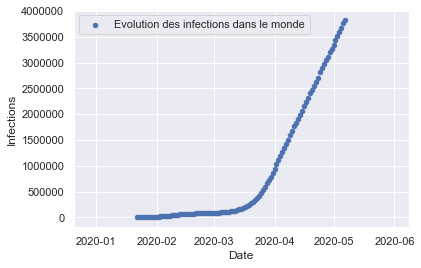

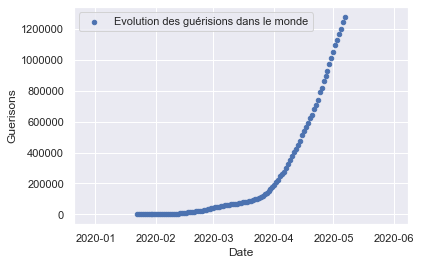

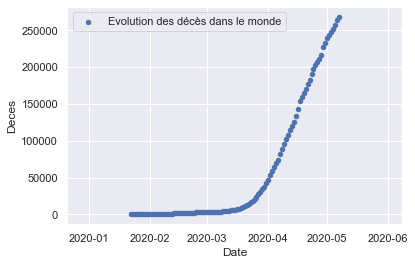

In [56]:
# #Evolution de la pandemie dans le monde
#avec le module pandas
sns.set()
EvolPand.plot.scatter(x='Date',y='Infections',label='Evolution des infections dans le monde')
plt.savefig('EvolutionInfecNu.png')
EvolPand.plot.scatter(x='Date',y='Guerisons',label='Evolution des guérisions dans le monde')
plt.savefig('EvolutGuerisNU.png')
EvolPand.plot.scatter(x='Date',y='Deces',label='Evolution des décès dans le monde')
plt.savefig('EvolutDeceNu.png')


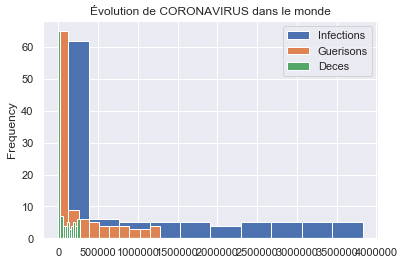

In [57]:
#Histogramme l'évolution de Coronavirs dans le monde (mise à jour depuis le site des données)
sns.set()
EvolPand['Infections'].plot.hist()
EvolPand['Guerisons'].plot.hist()
EvolPand['Deces'].plot.hist()
plt.title('Évolution de CORONAVIRUS dans le monde')
plt.legend()
plt.savefig('EvolutionsCorna.png')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


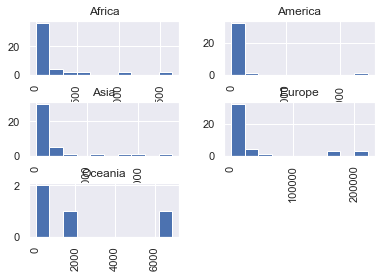

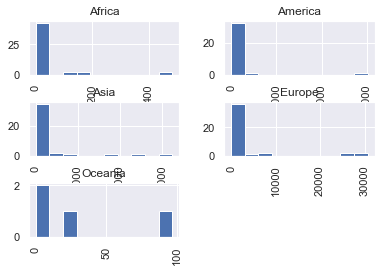

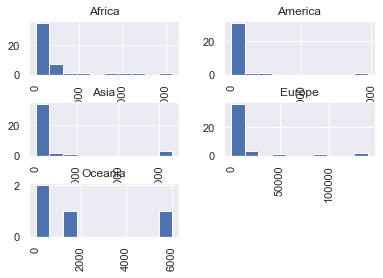

In [58]:
#histogramme des frequences d'infections par continent
sns.set()
donnee.dropna().hist(column='Infections',by='Continent')
plt.title('Évolution de l''infection de CORONAVIRUS par Continent')
plt.legend()
plt.savefig('InfectionsCor.png')


sns.set()
donnee.dropna().hist(column='Decedes',by='Continent')
plt.title('Évolution de décès de CORONAVIRUS par Continent')
plt.legend()
plt.savefig('DecedesCor.png')


sns.set()
donnee.dropna().hist(column='Guerisions',by='Continent')
plt.title('Évolution de guerisions de CORONAVIRUS dans le monde')
plt.legend()
plt.savefig('guerisionsCor.png')


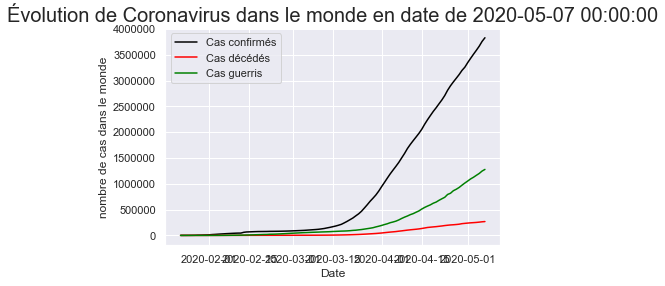

<Figure size 432x288 with 0 Axes>

In [61]:
#Evolutions des allures de Coronavirus dans le monde
EvolPand=EvolPand.sort_values('Date',ascending=True)
sns.set()
plt.plot(EvolPand['Date'],EvolPand['Infections'],label='Cas confirmés',color='black')
plt.plot(EvolPand['Date'],EvolPand['Deces'],label='Cas décédés',color='red')
plt.plot(EvolPand['Date'],EvolPand['Guerisons'],label='Cas guerris',color='green')
plt.xlabel('Date')
plt.ylabel('nombre de cas dans le monde')
plt.title('Évolution de Coronavirus dans le monde en date de'+' '+str(EvolPand ['Date'].max()),fontsize=20 )
plt.legend()
plt.show()
plt.savefig('evolution.png')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 106 to 0
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date1          107 non-null    object        
 1   Date           107 non-null    datetime64[ns]
 2   Infections     107 non-null    int64         
 3   Deces          107 non-null    int64         
 4   Guerisons      107 non-null    int64         
 5   TauxDeces      107 non-null    float64       
 6   TauxGuerison   107 non-null    float64       
 7   TauxInfection  107 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 7.5+ KB


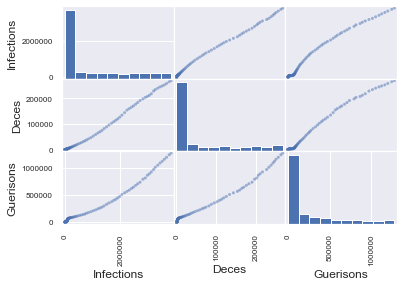

In [62]:
#visualisation matricielle
EvolPand.info()
pandas.plotting.scatter_matrix(EvolPand.select_dtypes(exclude=['object','datetime64[ns]','float64']))
plt.savefig('MatrixPlotEvoCorno.png')

In [63]:
# =============================================================================
# analyse bivariée
# =============================================================================


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


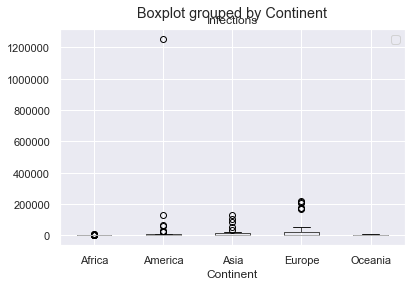

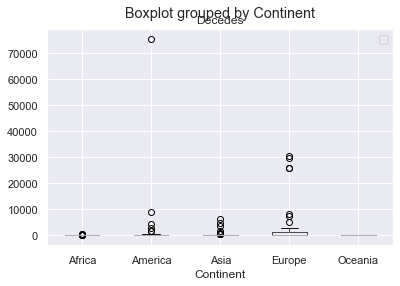

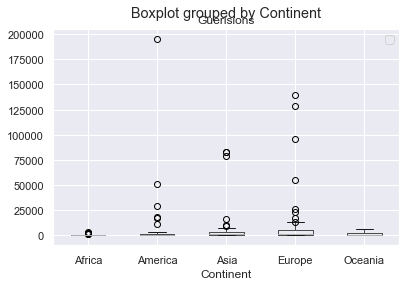

In [64]:
#Boxplot par continent des infections de Coronavirus
# plt.figure(figsize=(8,6), dpi=80)
sns.set()
donnee.dropna().boxplot(column='Infections',by='Continent')
plt.legend()
plt.savefig('InfectioContinet.png')

#Boxplot par continent des deces
# plt.figure(figsize=(8,6), dpi=80)
sns.set()
donnee.dropna().boxplot(column='Decedes',by='Continent')
plt.legend()
plt.savefig('DecedesContinet.png')

#Boxplot par continent des Guerisions
# plt.figure(figsize=(8,6), dpi=80)
sns.set()
donnee.dropna().boxplot(column='Guerisions',by='Continent')
plt.legend()
plt.savefig('GuerisContinet.png')


In [68]:
# Afficher les statistiques au niveau monde
donnee= donnee.sort_values('Infections',ascending=False)

colM1=['Infections','Decedes','Guerisions','RNB','Pop2018']
colM2=['TauxInfections','TauxDecedes','TauxGuerisions','TauxRNB','TauxPop2018','TauxPopRural','TauxSurfRural']

#les totaux
donnee[colM1].sum()

Infections    3.835399e+06
Decedes       2.689070e+05
Guerisions    1.278974e+06
RNB           3.206070e+06
Pop2018       7.541177e+09
dtype: float64

In [69]:
donnee[colM2].sum()

TauxInfections        50.859423
TauxDecedes            3.565849
TauxGuerisions        16.959873
TauxRNB               42.514187
TauxPop2018       100000.000000
TauxPopRural        -189.926261
TauxSurfRural         37.621581
dtype: float64

In [70]:

#Matrice de corrélation entre les variables

In [71]:
donnee[colM1].corr()

,Infections,Decedes,Guerisions,RNB,Pop2018
Infections,1.000000,0.934301,0.798834,0.240837,0.229792
Decedes,0.934301,1.000000,0.781021,0.249486,0.184750
Guerisions,0.798834,0.781021,1.000000,0.257195,0.325354
RNB,0.240837,0.249486,0.257195,1.000000,-0.052541
Pop2018,0.229792,0.184750,0.325354,-0.052541,1.000000


In [72]:
donnee[colM2].corr()

,TauxInfections,TauxDecedes,TauxGuerisions,TauxRNB,TauxPop2018,TauxPopRural,TauxSurfRural
TauxInfections,1.000000,0.934301,0.798834,0.240837,0.229792,0.000942,0.099279
TauxDecedes,0.934301,1.000000,0.781021,0.249486,0.184750,0.002901,0.060430
TauxGuerisions,0.798834,0.781021,1.000000,0.257195,0.325354,0.001563,0.075286
TauxRNB,0.240837,0.249486,0.257195,1.000000,-0.052541,-0.299532,0.007525
TauxPop2018,0.229792,0.184750,0.325354,-0.052541,1.000000,0.011713,-0.022112
TauxPopRural,0.000942,0.002901,0.001563,-0.299532,0.011713,1.000000,0.061880
TauxSurfRural,0.099279,0.060430,0.075286,0.007525,-0.022112,0.061880,1.000000


In [73]:
#Visualisation des influences entre variables

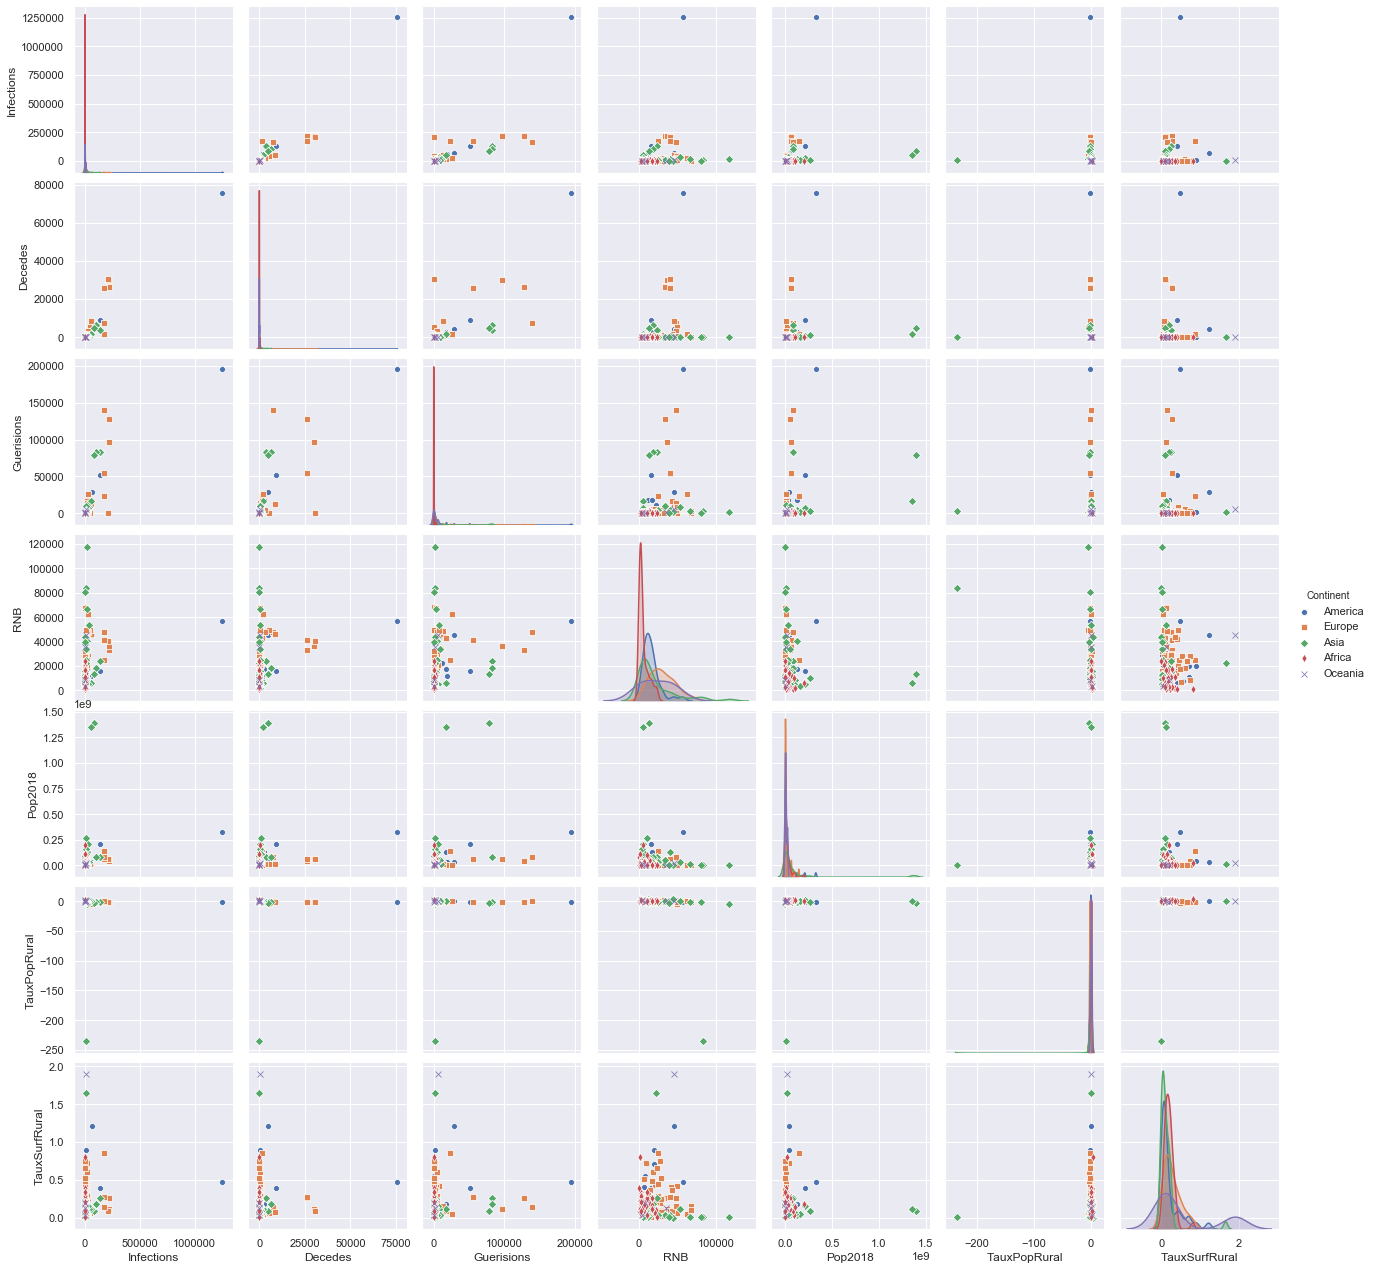

In [75]:
sns.pairplot(donnee[['Continent' ,'Infections','Decedes','Guerisions','RNB','Pop2018','TauxPopRural','TauxSurfRural']].dropna(), hue="Continent", markers=["o", "s", "D","d","x"])

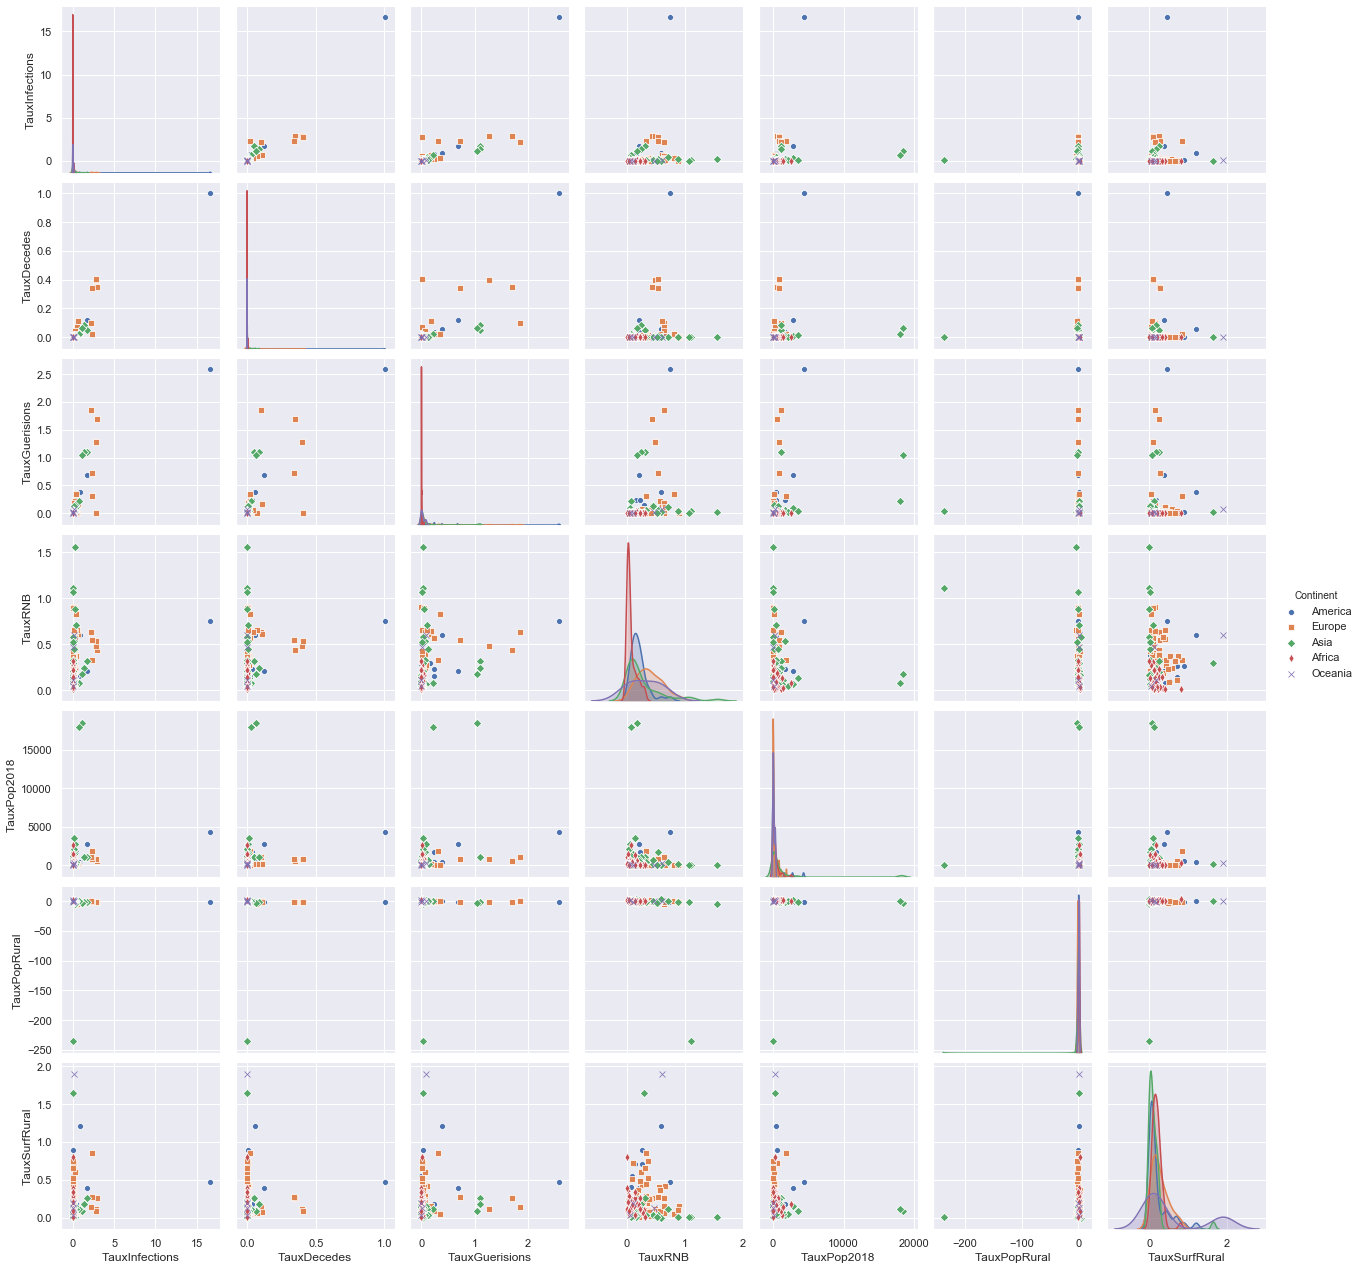

In [76]:
sns.pairplot(donnee[['Continent' ,'TauxInfections','TauxDecedes','TauxGuerisions','TauxRNB','TauxPop2018','TauxPopRural','TauxSurfRural']].dropna(), hue="Continent", markers=["o", "s", "D","d","x"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Dispersion de CORONAVIRUS entre Continent')

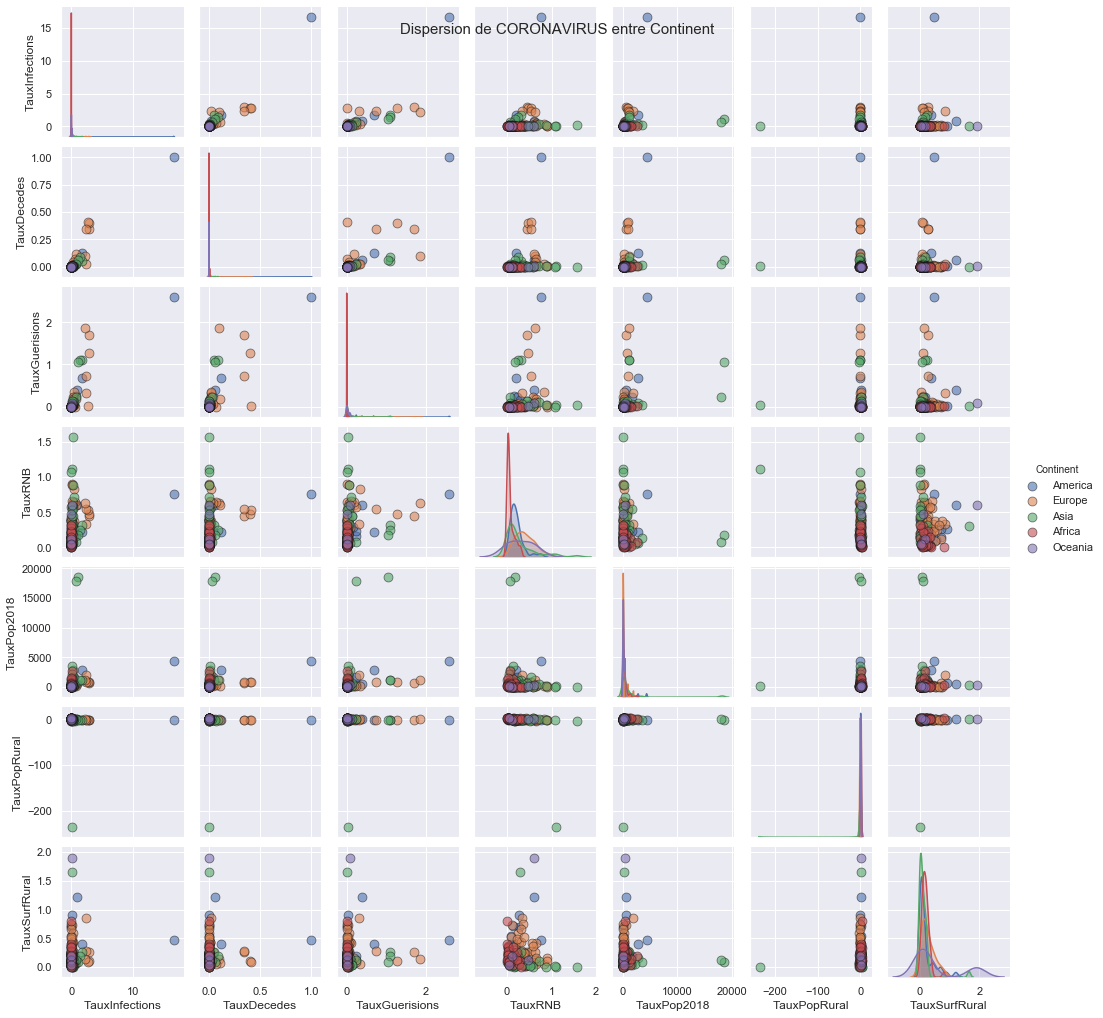

In [77]:
#Dataviz
sns.pairplot(donnee[['Continent' ,'TauxInfections','TauxDecedes','TauxGuerisions','TauxRNB','TauxPop2018','TauxPopRural','TauxSurfRural']].dropna(), hue = 'Continent', diag_kind = 'kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 2)
plt.suptitle('Dispersion de CORONAVIRUS entre Continent', size = 15)


Text(0.5, 0.98, 'Dispersion de CORONAVIRUS en EUROPE')

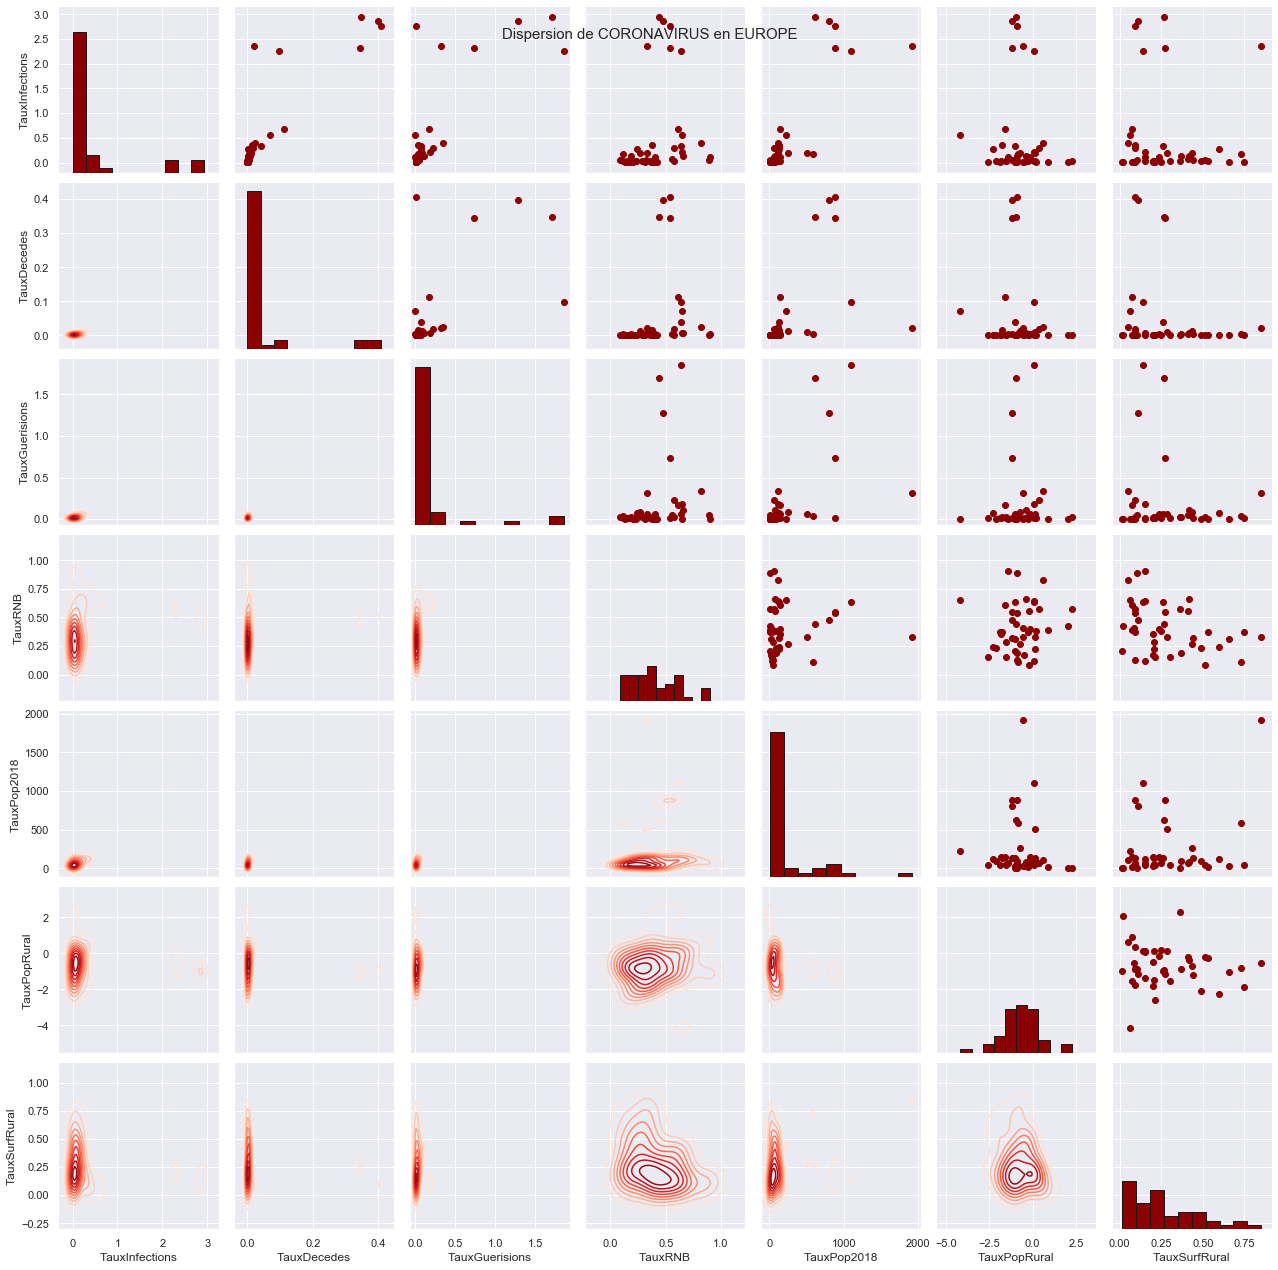

In [78]:
#etude par rapport à EUROPE sur la dispersion
grid = sns.PairGrid(data= donnee[donnee['Continent']=='Europe'].dropna(), vars = ['TauxInfections', 'TauxDecedes', 'TauxGuerisions','TauxRNB','TauxPop2018','TauxPopRural','TauxSurfRural'])
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred',edgecolor = 'k')
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
plt.suptitle('Dispersion de CORONAVIRUS en EUROPE', size = 15)



Text(0.5, 0.98, 'Dispersion de CORONAVIRUS en EUROPE')

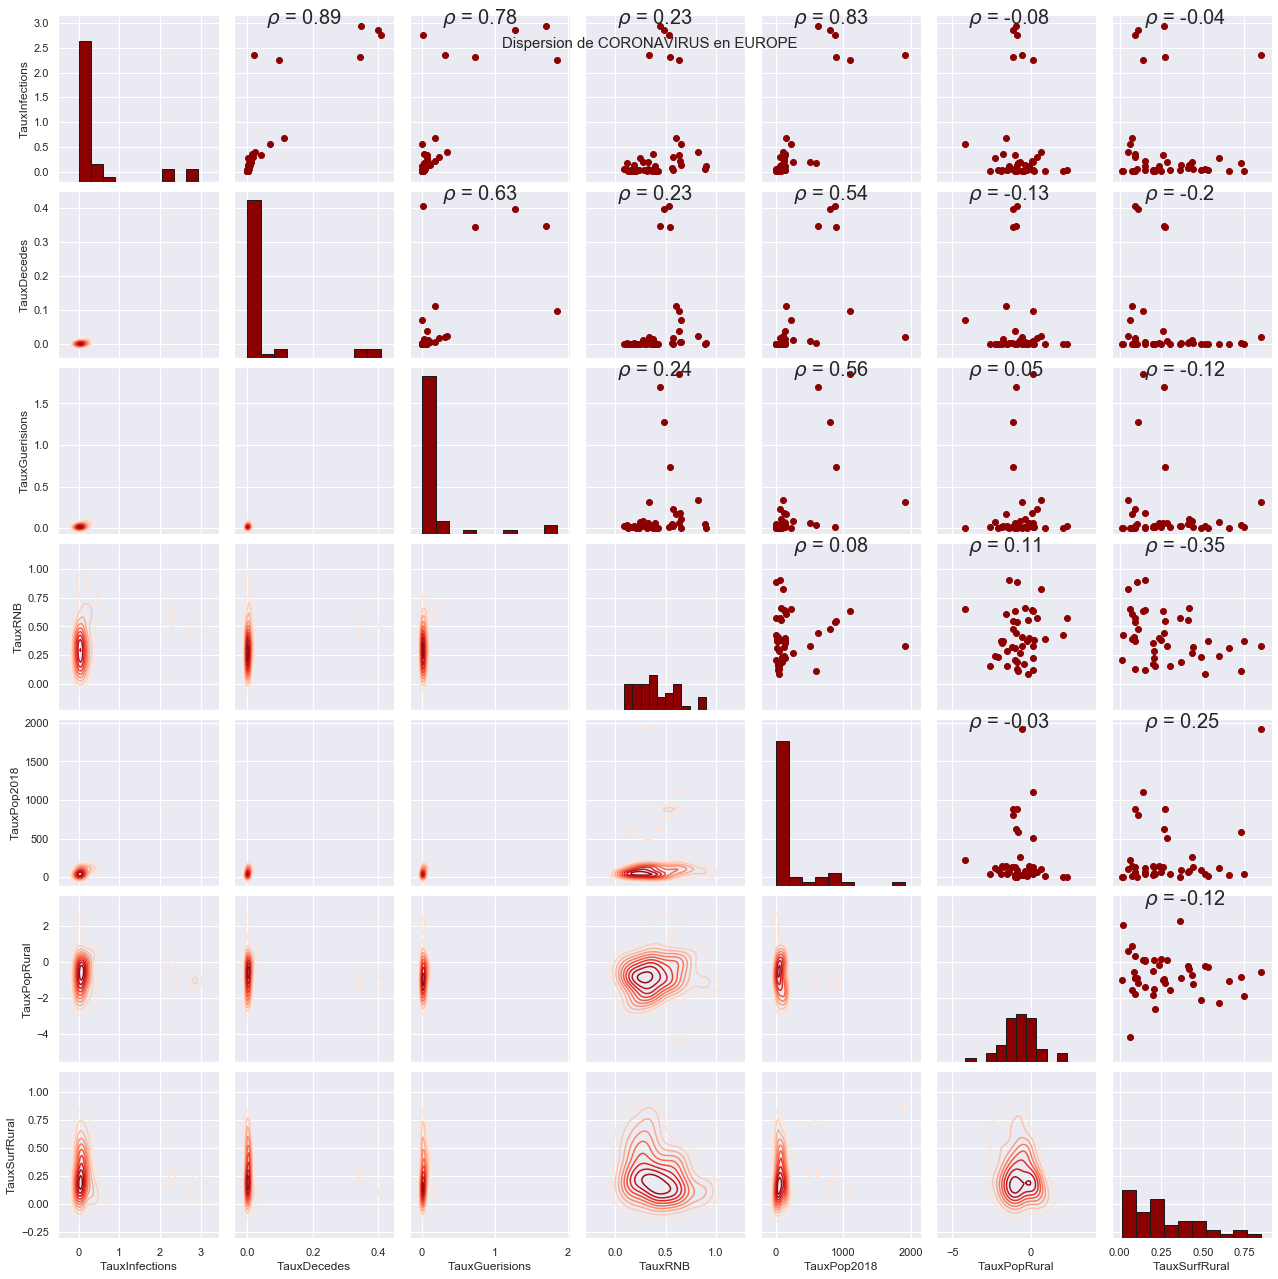

In [79]:

#avec correlation
def corr(x, y, **kwargs):
    
    coef = np.corrcoef(x, y)[0][1]
    label = r'$\rho$ = ' + str(round(coef, 2))
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    
grid = sns.PairGrid(data= donnee[donnee['Continent']=='Europe'].dropna(), vars = ['TauxInfections', 'TauxDecedes', 'TauxGuerisions','TauxRNB','TauxPop2018','TauxPopRural','TauxSurfRural'])
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');
plt.suptitle('Dispersion de CORONAVIRUS en EUROPE', size = 15)

In [80]:
# =============================================================================
# Data visualisation (apprentissage)
# =============================================================================

In [81]:
#visualisation correlation
corr=donnee[colM1].corr()
corr1=donnee[colM2].corr()

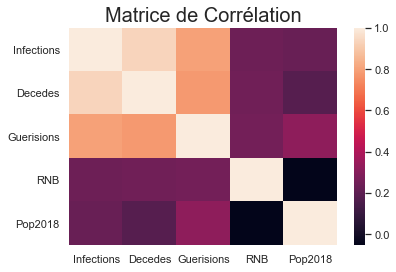

In [82]:
ax =sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)
plt.title('Matrice de Corrélation', fontsize = 20)
#plt.xlabel('Vari', fontsize = 15)
#plt.ylabel('Vari', fontsize = 15)
plt.show()


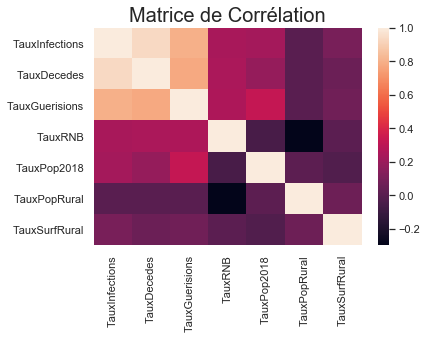

In [83]:
ax =sns.heatmap(corr1,xticklabels=corr1.columns,yticklabels=corr1.columns)
plt.title('Matrice de Corrélation', fontsize = 20)
#plt.xlabel('Vari', fontsize = 15)
#plt.ylabel('Vari', fontsize = 15)
plt.show()


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


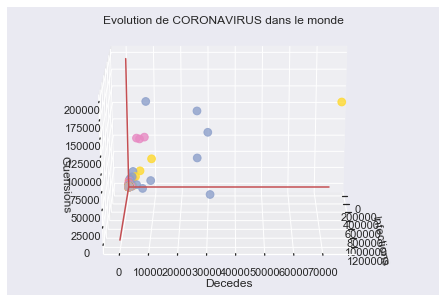

In [84]:
#Visualisation en 3D
#3D
donnee['Continent']=pd.Categorical(donnee['Continent'])
my_color=donnee['Continent'].cat.codes
fig = plt.figure()
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)
ax = fig.add_subplot(111, projection='3d')
#ax.set_facecolor((0.5, 0.5, 0.5))
ax.scatter(donnee['Infections'],donnee['Decedes'],donnee['Guerisions'],c=my_color,alpha=0.8 ,cmap="Set2_r", s=60)
xAxisLine = ((min(donnee['Infections']), max(donnee['Infections'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(donnee['Decedes']), max(donnee['Decedes'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(donnee['Guerisions']), max(donnee['Guerisions'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
ax.set_xlabel("Infections")
ax.set_ylabel("Decedes")
ax.set_zlabel("Guerisions")
ax.set_title("Evolution de CORONAVIRUS dans le monde")
#plt.axis('off')
# plot.show()

#3D en animation
def update(i, fig, ax):
    ax.view_init(elev=20., azim=i)
    return fig, ax
 
anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), repeat=True, fargs=(fig, ax))
anim.save('evolution.gif', dpi=80, writer='imagemagick', fps=24)

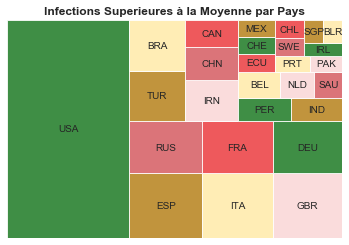

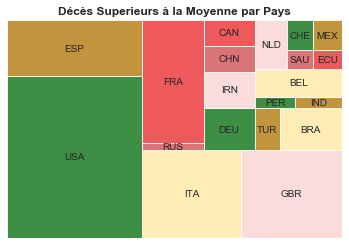

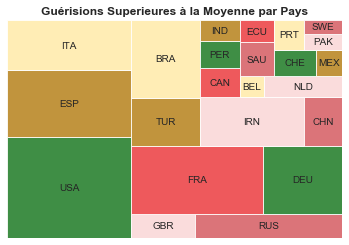

In [85]:
#Treemap  : Comparaison à la moyenne selon les variables en fonction des pays
color_list = ['#0f7216', '#b2790c', '#ffe9a3','#f9d4d4', '#d35158', '#ea3033']

plt.rc('font', size=10)
squarify.plot(sizes=donnee[donnee['Infections']>donnee['Infections'].mean()]['Infections'], label=donnee['Code'], alpha=.8,color=color_list)
plt.axis('off')
plt.title("Infections Superieures à la Moyenne par Pays",fontsize=12,fontweight="bold")
plt.show()

plt.rc('font', size=10)
squarify.plot(sizes=donnee[donnee['Decedes']>donnee['Decedes'].mean()]['Decedes'], label=donnee['Code'], alpha=.8,color=color_list )
plt.axis('off')
plt.title("Décès Superieurs à la Moyenne par Pays",fontsize=12,fontweight="bold")
plt.show()

plt.rc('font', size=10)
squarify.plot(sizes=donnee[donnee['Guerisions']>donnee['Guerisions'].mean()]['Guerisions'], label=donnee['Code'], alpha=.8,color=color_list )
plt.axis('off')
plt.title("Guérisions Superieures à la Moyenne par Pays",fontsize=12,fontweight="bold")
plt.show()

TypeError: grid() takes from 1 to 2 positional arguments but 3 were given

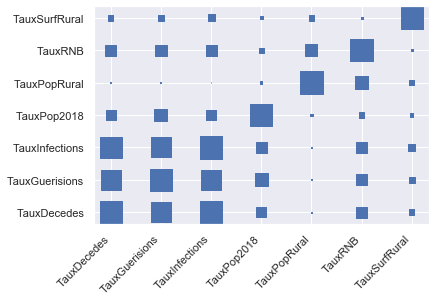

In [87]:
#customer
def heatmap1(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), 
        y=y.map(y_to_num), 
        s=size * size_scale,
        marker='s' 
    )
    
    
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
corr2 = pd.melt(corr1.reset_index(), id_vars='index')
corr2.columns = ['x', 'y', 'value']

heatmap1(x=corr2['x'],y=corr2['y'],size=corr2['value'].abs())
ax.grid(False, 'major')
ax.grid(True, 'minor')
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)


In [88]:
# =============================================================================
# carte du monde interactive
# =============================================================================

In [91]:
##infections
m=folium.Map(location=[31.7917,-7.0926],zoom_start=6, max_zoom=5,min_zoom=2)
for i in range(0,len(Infections)):
  folium.Circle(
      location=[Infections.iloc[i]['Lat'],Infections.iloc[i]['Long']],
      fill=True,
      radius=(int((np.log(Infections.iloc[i,-1]+1.00001)))+0.2)*50000,
      color='red',
      fill_color='indigo',
      tooltip = "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+Infections.iloc[i]['Country/Region'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Infections: "+str(Infections.iloc[i,-1])+"</li>"+
                        "<li>Deces:   "+str(Deces.iloc[i,-1])+"</li>"+
                        "<li>Taux de mortalite: "+ str(np.round(Deces.iloc[i,-1]/(Infections.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(m)
m.save("infections.html")
m



In [95]:
##Guerisons
m1=folium.Map(location=[31.7917,-7.0926],zoom_start=6, max_zoom=5,min_zoom=2)
for i in range(0,len(Guerisions)):
  folium.Circle(
      location=[Guerisions.iloc[i]['Lat'],Guerisions.iloc[i]['Long']],
      fill=True,
      radius=(int((np.log(Guerisions.iloc[i,-1]+1.00001)))+0.2)*25000,
      color='crimson',
      fill_color='crimson',
      legend_name='Guerisons',
      tooltip = "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+Guerisions.iloc[i]['Country/Region'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Guerisons: "+str(Guerisions.iloc[i,-1])+"</li>"+
                        "<li>Deces:   "+str(Deces.iloc[i,-1])+"</li>"+
                        "<li>Taux de mortalite: "+ str(np.round(Deces.iloc[i,-1]/(Infections.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(m1)
m1.save("guerisions.html")
m1



In [96]:
# =============================================================================
# carte du monde
# =============================================================================


In [97]:
#importation de la carte
Monde= gpd.read_file("pays-monde.shp")
type(Monde)
Monde.head()


,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.88722 ..."
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.80222, 4.78583 36.89472, ..."
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76805, 45.81999 39..."
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.60056 41.79666..."
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"POLYGON ((45.15387 41.19860, 46.00194 40.22555..."


In [98]:
#merge des données
donnee['ISO3']=donnee['Code']
donnee.columns
Monde=pd.merge(Monde,donnee[['Continent','Infections','Decedes','Guerisions','RNB','Pop2018','TauxPopRural', 'TauxSurfRural','TauxInfections', 'TauxDecedes', 'TauxGuerisions', 'TauxRNB','TauxPop2018','ISO3']], how='left', on='ISO3')
Monde1=Monde.dropna()

No handles with labels found to put in legend.


AttributeError: 'AxesSubplot' object has no attribute 'set_bbox_to_anchor'

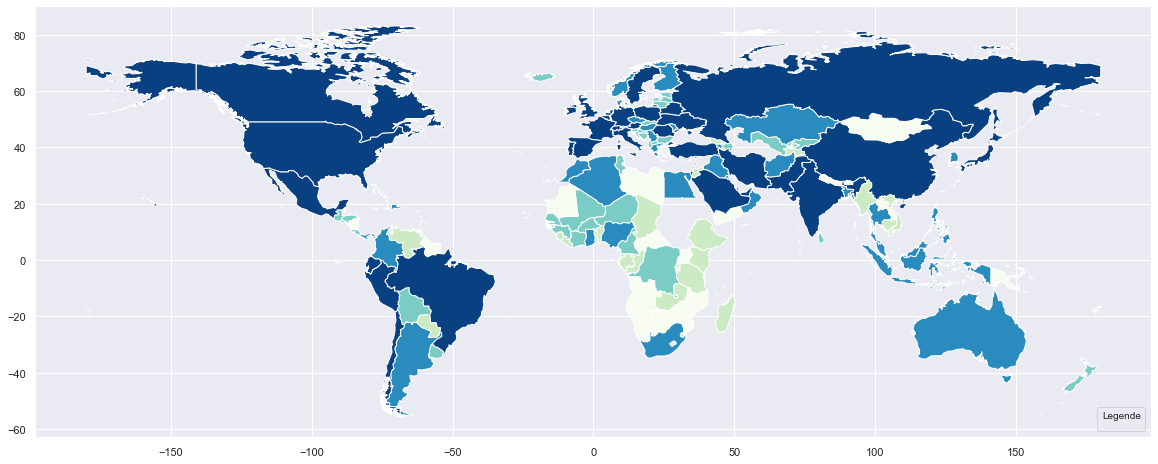

In [99]:
fig, ax = plt.subplots(figsize=(20,15))
Monde1.plot(column='TauxInfections', scheme='Quantiles', k=5 ,cmap='GnBu', ax=ax)
# ax.set_axis_off()
ax.legend(title='Legende',loc='lower right',prop={'size': 12},fontsize=15,frameon=True)
ax.set_bbox_to_anchor(1.0, .5)
ax.set_title("Evolution de la pandémie", fontsize=25)